"""
本文件功能说明：
- Phase 3: 探索性数据分析（Exploratory Data Analysis, EDA）
- 6个主题分析：顶级视频排行、互动率深度分析、时间模式发现、频道对比、综合洞察
- 生成8张高分辨率可视化图表（300 DPI）
- 顶级视频排行分析：观看数、点赞数、评论数、参与率排名
- 互动率深度分析：参与率分布、互动模式、病毒视频识别
- 时间模式分析：发布时间趋势、周期性规律、最佳发布时段
- 频道对比分析：大小频道对比、规模差异、增长模式
- 视频特征分析：标题长度、内容质量、特征重要性
"""

## 第1部分：导入库和Loading data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import os

warnings.filterwarnings('ignore')

# 设置绘图风格
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

print("Libraries loaded successfully")

# Load data
print("\n  Loading data...")
df = pd.read_csv('engineered_features_raw.csv')
print(f"   Data shape: {df.shape}")
print(f"   Columns: {len(df.columns)}")
print(f"   Rows: {len(df):,}")

# Convert date
df['published_date'] = pd.to_datetime(df['published_date'])
print(f"\n  Data loaded successfully!")

Libraries loaded successfully

  Loading data...
   Data shape: (155669, 68)
   Columns: 68
   Rows: 155,669

  Data loaded successfully!
   Data shape: (155669, 68)
   Columns: 68
   Rows: 155,669

  Data loaded successfully!


## Part 2: Top Video Rankings Analysis

In [3]:
print("="*80)
print("Top Video Rankings Analysis")
print("="*80)

# 1. Videos with most views
print("\n Top 10 Videos by View Count:")
top_views = df.nlargest(10, 'view_count')[['title', 'channel_name', 'view_count', 'like_count', 'comment_count', 'published_date']]
for idx, (i, row) in enumerate(top_views.iterrows(), 1):
    print(f"{idx}. {row['title'][:50]}...")
    print(f"   Channel: {row['channel_name'][:40]}")
    print(f"   Views: {row['view_count']:,.0f} | Likes: {row['like_count']:,.0f} | Comments: {row['comment_count']:,.0f}")
    print()

# 2. Videos with most likes
print("\n Top 10 Videos by Likes:")
top_likes = df.nlargest(10, 'like_count')[['title', 'channel_name', 'like_count', 'view_count', 'engagement_rate']]
for idx, (i, row) in enumerate(top_likes.iterrows(), 1):
    print(f"{idx}. {row['title'][:50]}...")
    print(f"   Channel: {row['channel_name'][:40]}")
    print(f"   Likes: {row['like_count']:,.0f} | Views: {row['view_count']:,.0f} | Engagement Rate: {row['engagement_rate']:.4%}")
    print()

# 3. Videos with most comments
print("\n Top 10 Videos by Comments:")
top_comments = df.nlargest(10, 'comment_count')[['title', 'channel_name', 'comment_count', 'view_count', 'engagement_rate']]
for idx, (i, row) in enumerate(top_comments.iterrows(), 1):
    print(f"{idx}. {row['title'][:50]}...")
    print(f"   Channel: {row['channel_name'][:40]}")
    print(f"   Comments: {row['comment_count']:,.0f} | Views: {row['view_count']:,.0f} | Engagement Rate: {row['engagement_rate']:.4%}")
    print()

# 4. Videos with highest engagement rate
print("\n Top 10 Videos by Engagement Rate:")
top_engagement = df.nlargest(10, 'engagement_rate')[['title', 'channel_name', 'engagement_rate', 'view_count', 'like_count', 'comment_count']]
for idx, (i, row) in enumerate(top_engagement.iterrows(), 1):
    print(f"{idx}. {row['title'][:50]}...")
    print(f"   Channel: {row['channel_name'][:40]}")
    print(f"   Engagement Rate: {row['engagement_rate']:.4%} | Views: {row['view_count']:,.0f} | Interactions: {row['like_count'] + row['comment_count']:,.0f}")
    print()

# 5. Videos with highest content quality score
print("\n Top 10 Videos by Content Quality Score:")
top_quality = df.nlargest(10, 'content_quality_score')[['title', 'channel_name', 'content_quality_score', 'engagement_rate', 'view_count']]
for idx, (i, row) in enumerate(top_quality.iterrows(), 1):
    print(f"{idx}. {row['title'][:50]}...")
    print(f"   Channel: {row['channel_name'][:40]}")
    print(f"   Quality Score: {row['content_quality_score']:.2f}/100 | Engagement Rate: {row['engagement_rate']:.4%} | Views: {row['view_count']:,.0f}")
    print()

Top Video Rankings Analysis

 Top 10 Videos by View Count:
1. Учим цвета Разноцветные яйца на ферме Miroshka Tv...
   Channel: Мирошка ТВ
   Views: 5,367,568,626 | Likes: 14,119,478 | Comments: 0

2. The Gummy Bear Song - Long English Version...
   Channel: icanrockyourworld
   Views: 3,751,827,725 | Likes: 9,058,218 | Comments: 0

3. 4 Non Blondes - What's Up (Official Music Video)...
   Channel: 4NonBlondesVEVO
   Views: 2,017,112,317 | Likes: 8,361,235 | Comments: 228,805

4. Rahat Fateh Ali Khan - Zaroori Tha...
   Channel: RahatFAKhanVEVO
   Views: 1,709,742,157 | Likes: 9,657,447 | Comments: 390,658

5. Anuel AA, KAROL G - Secreto...
   Channel: AnuelVEVO
   Views: 1,634,330,294 | Likes: 7,861,028 | Comments: 277,539

6. Dr. Dre - Still D.R.E. ft. Snoop Dogg...
   Channel: DrDreVEVO
   Views: 1,634,142,669 | Likes: 12,092,389 | Comments: 352,078

7. Wednesday Addams DIY Barbie Clothes Tutorial #barb...
   Channel: Fun Kids House
   Views: 1,532,612,799 | Likes: 0 | Comments: 0

8

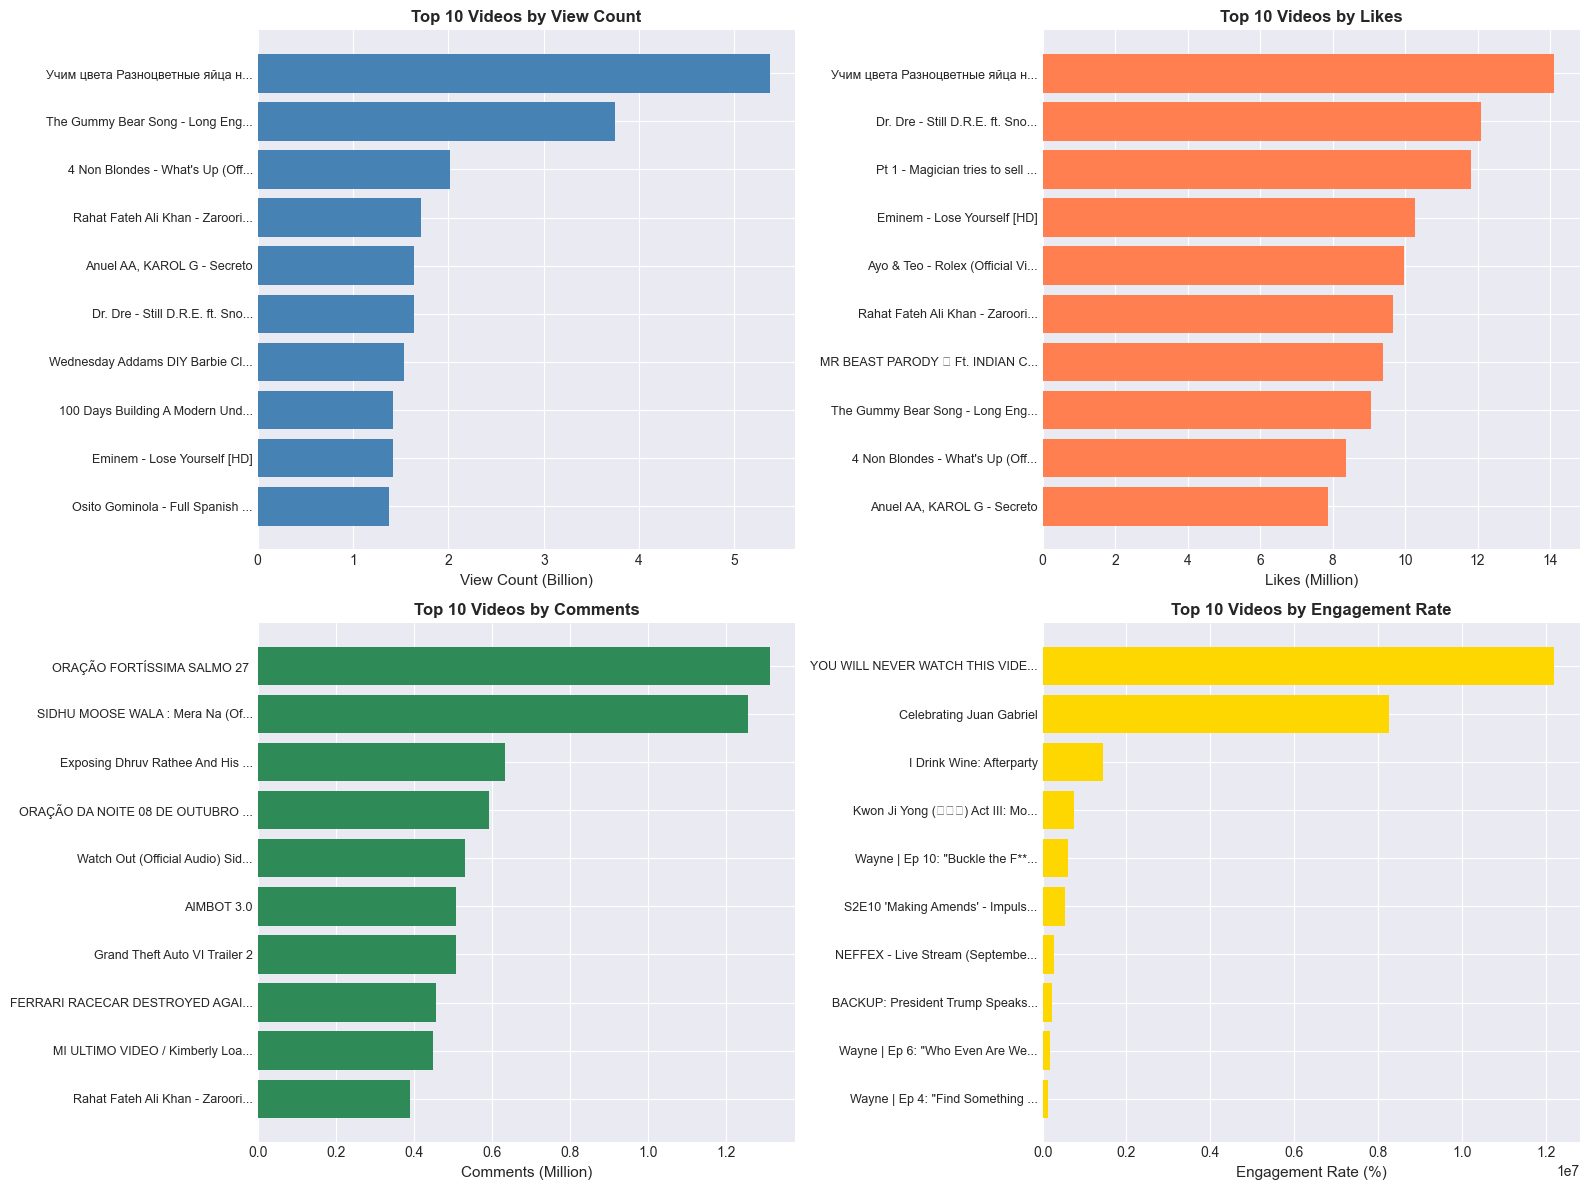


 Top videos visualization saved: top_videos_analysis.png


In [4]:
# 6. Top videos visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top 10 by View Count
ax1 = axes[0, 0]
top_10_views = df.nlargest(10, 'view_count')
y_pos = np.arange(len(top_10_views))
ax1.barh(y_pos, top_10_views['view_count'].values / 1e9, color='steelblue')
ax1.set_yticks(y_pos)
ax1.set_yticklabels([t[:30] + '...' if len(t) > 30 else t for t in top_10_views['title'].values], fontsize=9)
ax1.set_xlabel('View Count (Billion)', fontsize=11)
ax1.set_title('Top 10 Videos by View Count', fontsize=12, fontweight='bold')
ax1.invert_yaxis()

# Top 10 by Likes
ax2 = axes[0, 1]
top_10_likes = df.nlargest(10, 'like_count')
y_pos = np.arange(len(top_10_likes))
ax2.barh(y_pos, top_10_likes['like_count'].values / 1e6, color='coral')
ax2.set_yticks(y_pos)
ax2.set_yticklabels([t[:30] + '...' if len(t) > 30 else t for t in top_10_likes['title'].values], fontsize=9)
ax2.set_xlabel('Likes (Million)', fontsize=11)
ax2.set_title('Top 10 Videos by Likes', fontsize=12, fontweight='bold')
ax2.invert_yaxis()

# Top 10 by Comments
ax3 = axes[1, 0]
top_10_comments = df.nlargest(10, 'comment_count')
y_pos = np.arange(len(top_10_comments))
ax3.barh(y_pos, top_10_comments['comment_count'].values / 1e6, color='seagreen')
ax3.set_yticks(y_pos)
ax3.set_yticklabels([t[:30] + '...' if len(t) > 30 else t for t in top_10_comments['title'].values], fontsize=9)
ax3.set_xlabel('Comments (Million)', fontsize=11)
ax3.set_title('Top 10 Videos by Comments', fontsize=12, fontweight='bold')
ax3.invert_yaxis()

# Top 10 by Engagement Rate
ax4 = axes[1, 1]
top_10_engagement = df.nlargest(10, 'engagement_rate')
y_pos = np.arange(len(top_10_engagement))
ax4.barh(y_pos, top_10_engagement['engagement_rate'].values * 100, color='gold')
ax4.set_yticks(y_pos)
ax4.set_yticklabels([t[:30] + '...' if len(t) > 30 else t for t in top_10_engagement['title'].values], fontsize=9)
ax4.set_xlabel('Engagement Rate (%)', fontsize=11)
ax4.set_title('Top 10 Videos by Engagement Rate', fontsize=12, fontweight='bold')
ax4.invert_yaxis()

plt.tight_layout()
plt.savefig('photo/top_videos_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Top videos visualization saved: top_videos_analysis.png")

## Part 3: Engagement Rate Deep Dive Analysis

In [5]:
print("\n" + "="*80)
print(" Engagement Rate Analysis")
print("="*80)

# 1. Engagement category statistics
print("\n Engagement Category Statistics:")
viral_count = (df['is_viral'] == 1).sum()
ultra_viral_count = (df['is_ultra_viral'] == 1).sum()
unpopular_count = (df['is_unpopular'] == 1).sum()
normal_count = len(df) - viral_count - unpopular_count

print(f"   Ultra Viral Videos (is_ultra_viral): {ultra_viral_count:,} ({ultra_viral_count/len(df)*100:.2f}%)")
print(f"   Viral Videos (is_viral): {viral_count:,} ({viral_count/len(df)*100:.2f}%)")
print(f"   Normal Videos: {normal_count:,} ({normal_count/len(df)*100:.2f}%)")
print(f"   Unpopular Videos (is_unpopular): {unpopular_count:,} ({unpopular_count/len(df)*100:.2f}%)")

# 2. Engagement metrics statistics
print("\n Key Engagement Metrics:")
engagement_stats = {
    'Engagement Rate': df['engagement_rate'].describe(),
    'Like Rate': df['like_rate'].describe(),
    'Comment Rate': df['comment_rate'].describe()
}

for metric_name, stats in engagement_stats.items():
    print(f"\n{metric_name}:")
    print(f"   Mean: {stats['mean']:.6f}")
    print(f"   Median: {stats['50%']:.6f}")
    print(f"   Maximum: {stats['max']:.6f}")
    print(f"   Minimum: {stats['min']:.6f}")
    print(f"   Std Dev: {stats['std']:.6f}")

# 3. Likes vs Comments ratio analysis
print("\n Likes vs Comments Interaction Pattern:")
like_ratio = df['like_count'].sum() / (df['like_count'].sum() + df['comment_count'].sum()) * 100
comment_ratio = df['comment_count'].sum() / (df['like_count'].sum() + df['comment_count'].sum()) * 100
print(f"   Likes Percentage: {like_ratio:.1f}%")
print(f"   Comments Percentage: {comment_ratio:.1f}%")
print(f"   Average Likes to Comments Ratio: {(df['like_count'] / (df['comment_count'] + 1)).mean():.1f}:1")

# 4. Engagement Rate by View Count segments
print("\n Engagement Rate by View Count Segments:")
df['view_segment'] = pd.cut(df['view_count'], 
                             bins=[0, 1e5, 1e6, 1e7, 1e8, np.inf],
                             labels=['0-100K', '100K-1M', '1M-10M', '10M-100M', '100M+'])
segment_analysis = df.groupby('view_segment', observed=True).agg({
    'engagement_rate': ['mean', 'count'],
    'like_rate': 'mean',
    'comment_rate': 'mean',
    'is_viral': 'sum'
}).round(6)

for segment in ['0-100K', '100K-1M', '1M-10M', '10M-100M', '100M+']:
    if segment in df['view_segment'].unique():
        seg_data = df[df['view_segment'] == segment]
        print(f"\n   {segment} View Count:")
        print(f"      Video Count: {len(seg_data):,}")
        print(f"      Average Engagement Rate: {seg_data['engagement_rate'].mean():.6f}")
        print(f"      Average Like Rate: {seg_data['like_rate'].mean():.6f}")
        print(f"      Average Comment Rate: {seg_data['comment_rate'].mean():.6f}")
        print(f"      Viral Video Count: {(seg_data['is_viral'] == 1).sum()}")

# 5. Correlation between engagement rate and other factors
print("\n Correlation between Engagement Rate and Video Features:")
correlation_features = ['title_length', 'title_word_count', 'days_since_publish', 
                        'channel_video_count', 'views_vs_channel_avg']
for feature in correlation_features:
    corr = df[feature].corr(df['engagement_rate'])
    print(f"   {feature} vs Engagement Rate: {corr:.4f}")


 Engagement Rate Analysis

 Engagement Category Statistics:
   Ultra Viral Videos (is_ultra_viral): 11 (0.01%)
   Viral Videos (is_viral): 29 (0.02%)
   Normal Videos: 155,640 (99.98%)
   Unpopular Videos (is_unpopular): 0 (0.00%)

 Key Engagement Metrics:

Engagement Rate:
   Mean: 1.756023
   Median: 0.026455
   Maximum: 122088.000000
   Minimum: 0.000000
   Std Dev: 376.751997

Like Rate:
   Mean: 1.465166
   Median: 0.024669
   Maximum: 106917.000000
   Minimum: 0.000000
   Std Dev: 340.988491

Comment Rate:
   Mean: 0.290857
   Median: 0.001008
   Maximum: 15171.000000
   Minimum: 0.000000
   Std Dev: 48.632221

 Likes vs Comments Interaction Pattern:
   Likes Percentage: 96.0%
   Comments Percentage: 4.0%
   Average Likes to Comments Ratio: 644.1:1

 Engagement Rate by View Count Segments:

   0-100K View Count:
      Video Count: 99,999
      Average Engagement Rate: 0.046265
      Average Like Rate: 0.043353
      Average Comment Rate: 0.002913
      Viral Video Count: 1

   1

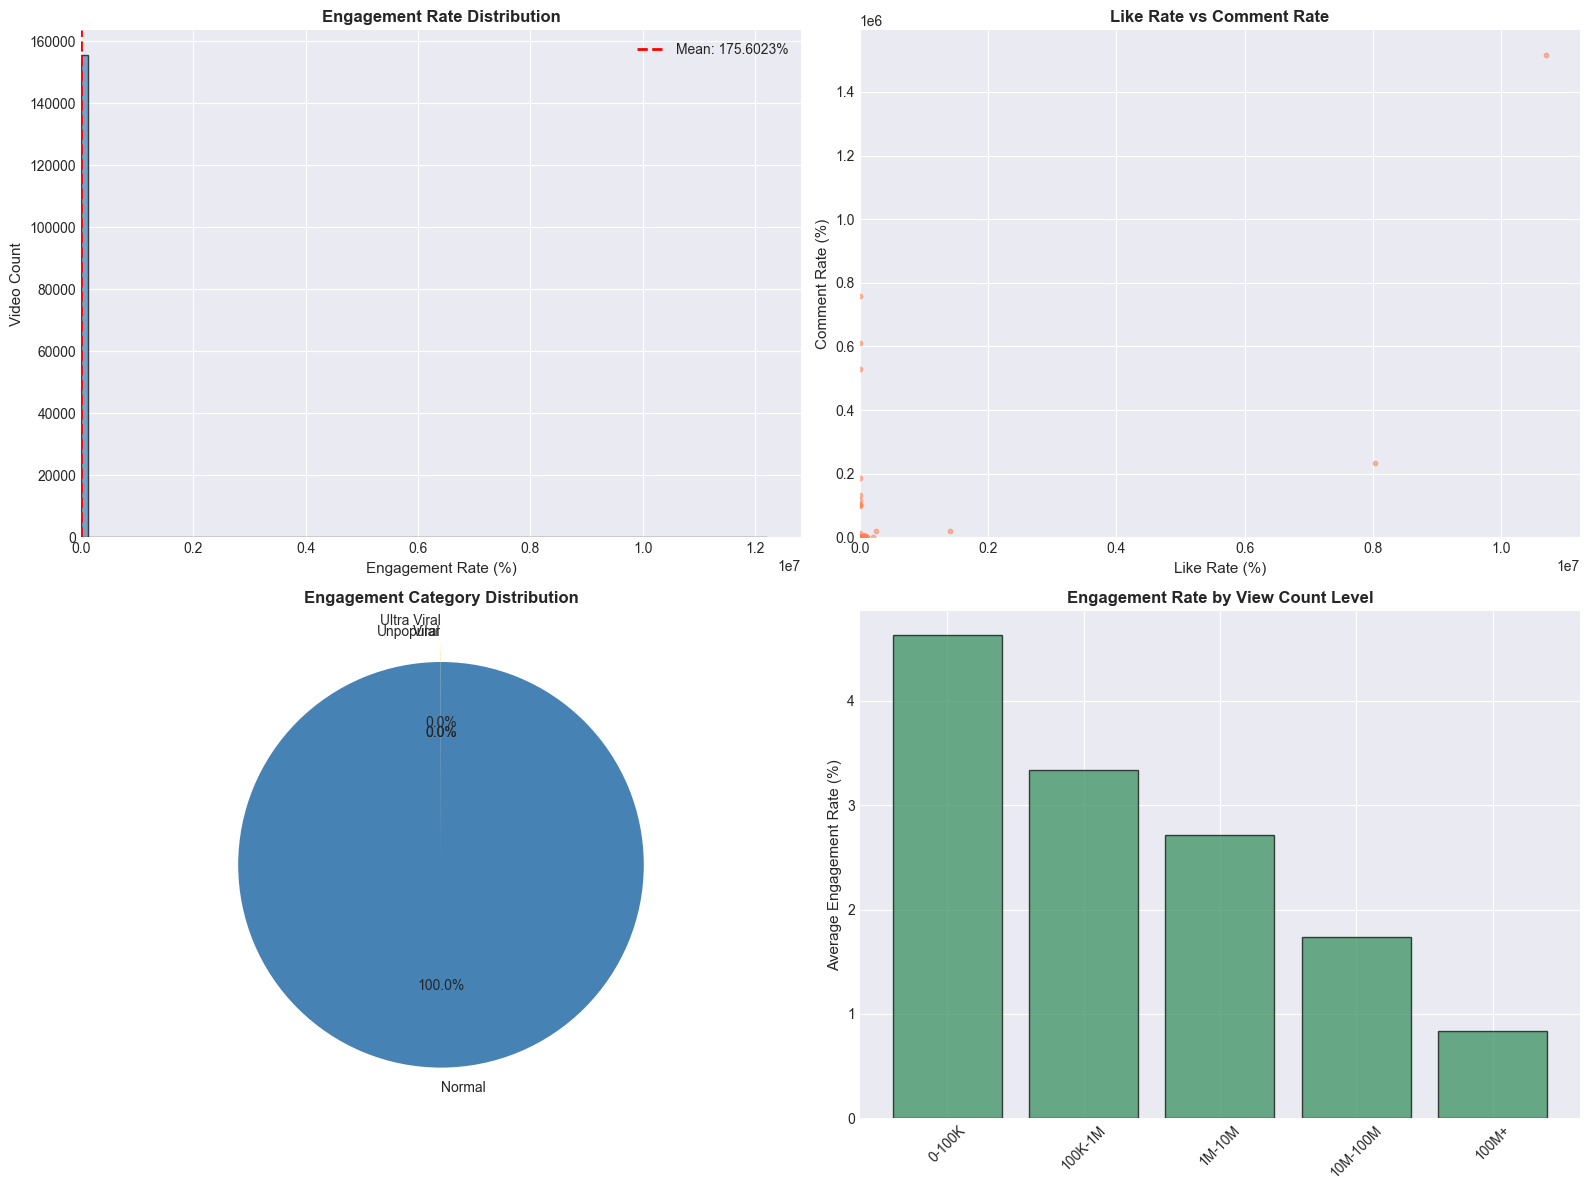


 Engagement analysis visualization saved: engagement_analysis.png


In [6]:
# 6. Engagement rate distribution visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Engagement Rate distribution
ax1 = axes[0, 0]
ax1.hist(df['engagement_rate'] * 100, bins=100, color='steelblue', edgecolor='black', alpha=0.7)
ax1.axvline(df['engagement_rate'].mean() * 100, color='red', linestyle='--', linewidth=2, label=f'Mean: {df["engagement_rate"].mean()*100:.4f}%')
ax1.set_xlabel('Engagement Rate (%)', fontsize=11)
ax1.set_ylabel('Video Count', fontsize=11)
ax1.set_title('Engagement Rate Distribution', fontsize=12, fontweight='bold')
ax1.legend()
ax1.set_xlim(left=0)

# Like Rate vs Comment Rate
ax2 = axes[0, 1]
ax2.scatter(df['like_rate'] * 100, df['comment_rate'] * 100, alpha=0.5, s=10, color='coral')
ax2.set_xlabel('Like Rate (%)', fontsize=11)
ax2.set_ylabel('Comment Rate (%)', fontsize=11)
ax2.set_title('Like Rate vs Comment Rate', fontsize=12, fontweight='bold')
ax2.set_xlim(left=0)
ax2.set_ylim(bottom=0)

# Engagement category pie chart
ax3 = axes[1, 0]
categories = ['Ultra Viral', 'Viral', 'Normal', 'Unpopular']
sizes = [ultra_viral_count, viral_count - ultra_viral_count, normal_count, unpopular_count]
colors = ['gold', 'orange', 'steelblue', 'lightcoral']
explode = (0.1, 0.05, 0, 0.05)
ax3.pie(sizes, labels=categories, autopct='%1.1f%%', startangle=90, explode=explode, colors=colors)
ax3.set_title('Engagement Category Distribution', fontsize=12, fontweight='bold')

# Engagement Rate by View Count segments
ax4 = axes[1, 1]
segments = []
means = []
for seg in ['0-100K', '100K-1M', '1M-10M', '10M-100M', '100M+']:
    if seg in df['view_segment'].unique():
        seg_data = df[df['view_segment'] == seg]
        segments.append(seg)
        means.append(seg_data['engagement_rate'].mean() * 100)

ax4.bar(range(len(segments)), means, color='seagreen', edgecolor='black', alpha=0.7)
ax4.set_xticks(range(len(segments)))
ax4.set_xticklabels(segments, rotation=45)
ax4.set_ylabel('Average Engagement Rate (%)', fontsize=11)
ax4.set_title('Engagement Rate by View Count Level', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('photo/engagement_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Engagement analysis visualization saved: engagement_analysis.png")

## Part 4: Temporal Patterns Discovery

In [7]:
print("\n" + "="*80)
print(" Temporal Pattern Analysis")
print("="*80)

# 1. Statistics by year
print("\n Statistics by Year:")
yearly_stats = df.groupby('publish_year').agg({
    'video_id': 'count',
    'view_count': 'mean',
    'engagement_rate': 'mean',
    'is_viral': 'sum'
}).rename(columns={'video_id': 'Video Count'})

print(yearly_stats.to_string())

# 2. Statistics by month
print("\n Statistics by Month:")
monthly_stats = df.groupby('publish_month').agg({
    'video_id': 'count',
    'view_count': 'mean',
    'engagement_rate': 'mean',
    'like_rate': 'mean',
    'comment_rate': 'mean'
}).rename(columns={'video_id': 'Video Count'})

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
print(monthly_stats.to_string())

# 3. Statistics by day of week
print("\n Statistics by Day of Week:")
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daily_stats = df.groupby('publish_dayofweek').agg({
    'video_id': 'count',
    'view_count': 'mean',
    'engagement_rate': 'mean',
    'is_viral': 'sum'
}).rename(columns={'video_id': 'Video Count'})
daily_stats.index = [day_names[i] for i in daily_stats.index]
print(daily_stats.to_string())

# 4. Statistics by hour
print("\n Statistics by Publishing Hour:")
hourly_stats = df.groupby('publish_hour').agg({
    'video_id': 'count',
    'view_count': 'mean',
    'engagement_rate': 'mean',
    'is_viral': 'sum'
}).rename(columns={'video_id': 'Video Count'})

print(hourly_stats[['Video Count', 'view_count', 'engagement_rate']].head(10).to_string())

# 5. Prime time vs Normal time
print("\n Prime Time Analysis:")
prime_time_data = df[df['is_prime_time'] == 1]
normal_time_data = df[df['is_prime_time'] == 0]

print(f"   Videos published during prime time (19-22): {len(prime_time_data):,} ({len(prime_time_data)/len(df)*100:.1f}%)")
print(f"      Average View Count: {prime_time_data['view_count'].mean():,.0f}")
print(f"      Average Engagement Rate: {prime_time_data['engagement_rate'].mean():.6f}")
print(f"      Viral Video Count: {(prime_time_data['is_viral'] == 1).sum()}")

print(f"\n   Videos published during normal time: {len(normal_time_data):,} ({len(normal_time_data)/len(df)*100:.1f}%)")
print(f"      Average View Count: {normal_time_data['view_count'].mean():,.0f}")
print(f"      Average Engagement Rate: {normal_time_data['engagement_rate'].mean():.6f}")
print(f"      Viral Video Count: {(normal_time_data['is_viral'] == 1).sum()}")

# 6. Weekend vs Weekday
print("\n Weekend vs Weekday Analysis:")
weekend_data = df[df['is_weekend'] == 1]
weekday_data = df[df['is_weekend'] == 0]

print(f"   Videos published on weekend: {len(weekend_data):,} ({len(weekend_data)/len(df)*100:.1f}%)")
print(f"      Average View Count: {weekend_data['view_count'].mean():,.0f}")
print(f"      Average Engagement Rate: {weekend_data['engagement_rate'].mean():.6f}")
print(f"      Viral Video Count: {(weekend_data['is_viral'] == 1).sum()}")

print(f"\n   Videos published on weekday: {len(weekday_data):,} ({len(weekday_data)/len(df)*100:.1f}%)")
print(f"      Average View Count: {weekday_data['view_count'].mean():,.0f}")
print(f"      Average Engagement Rate: {weekday_data['engagement_rate'].mean():.6f}")
print(f"      Viral Video Count: {(weekday_data['is_viral'] == 1).sum()}")


 Temporal Pattern Analysis

 Statistics by Year:
              Video Count    view_count  engagement_rate  is_viral
publish_year                                                      
2006                   10  7.314963e+05         0.005497         0
2007                   11  5.517749e+08         0.007632         0
2008                   15  5.893623e+06         0.022569         0
2009                  103  4.117670e+07         0.007442         0
2010                   40  3.882925e+07         0.283248         0
2011                  108  4.475968e+07         0.214480         0
2012                  201  8.654900e+06         0.980183         0
2013                  330  6.396863e+06         0.014112         0
2014                  579  1.365714e+07         0.012428         0
2015                  804  1.029452e+07         0.095767         0
2016                 1236  4.519286e+06         0.076939         0
2017                 2087  4.628183e+06         2.656135         4
2018        

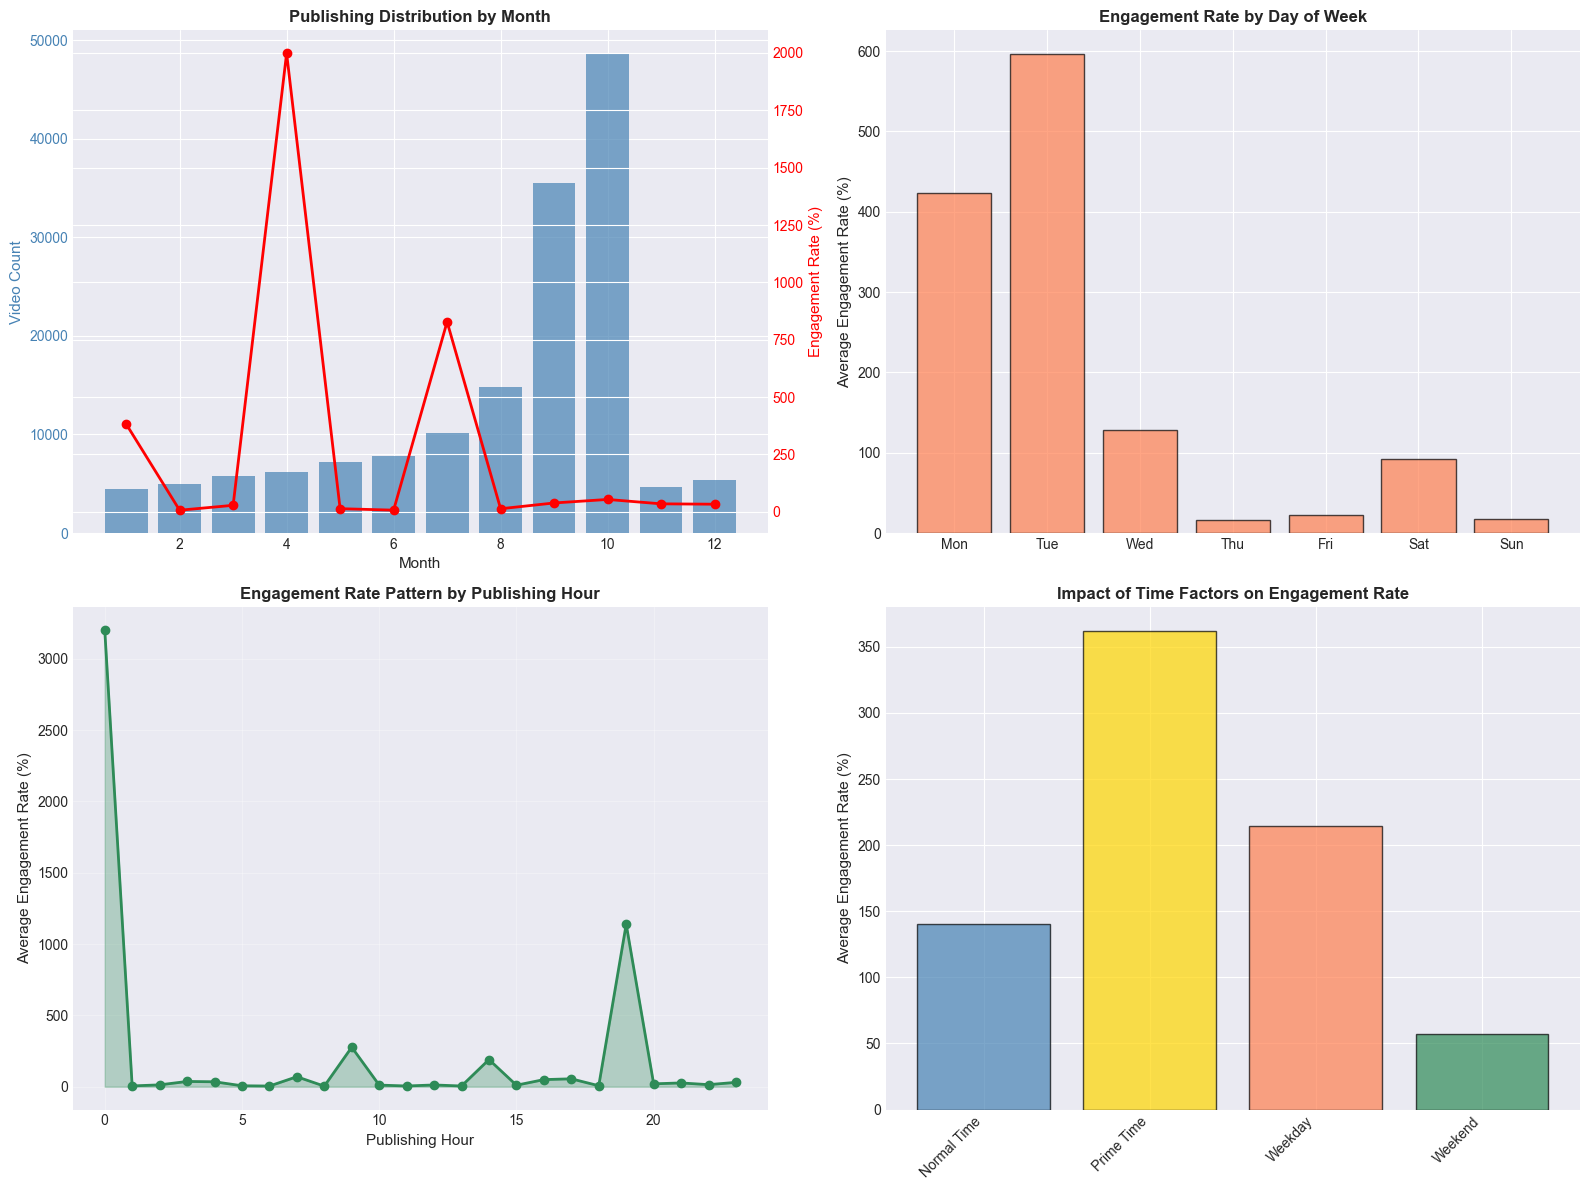


 Temporal pattern visualization saved: temporal_patterns.png


In [8]:
# 7. Temporal pattern visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Video Count and Engagement Rate by month
ax1 = axes[0, 0]
month_data = df.groupby('publish_month').agg({
    'video_id': 'count',
    'engagement_rate': 'mean'
}).rename(columns={'video_id': 'Video Count'})

ax1_2 = ax1.twinx()
ax1.bar(month_data.index, month_data['Video Count'], alpha=0.7, color='steelblue', label='Video Count')
ax1_2.plot(month_data.index, month_data['engagement_rate'] * 100, color='red', marker='o', linewidth=2, label='Average Engagement Rate')
ax1.set_xlabel('Month', fontsize=11)
ax1.set_ylabel('Video Count', fontsize=11, color='steelblue')
ax1_2.set_ylabel('Engagement Rate (%)', fontsize=11, color='red')
ax1.set_title('Publishing Distribution by Month', fontsize=12, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1_2.tick_params(axis='y', labelcolor='red')

# Engagement Rate by day of week
ax2 = axes[0, 1]
daily_data = df.groupby('publish_dayofweek').agg({
    'engagement_rate': 'mean',
    'is_viral': 'sum'
})
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax2.bar(range(7), daily_data['engagement_rate'].values * 100, color='coral', edgecolor='black', alpha=0.7)
ax2.set_xticks(range(7))
ax2.set_xticklabels(day_labels)
ax2.set_ylabel('Average Engagement Rate (%)', fontsize=11)
ax2.set_title('Engagement Rate by Day of Week', fontsize=12, fontweight='bold')

# Engagement Rate by publishing hour
ax3 = axes[1, 0]
hourly_data = df.groupby('publish_hour').agg({
    'engagement_rate': 'mean',
    'video_id': 'count'
}).rename(columns={'video_id': 'Video Count'})
ax3.plot(hourly_data.index, hourly_data['engagement_rate'].values * 100, marker='o', color='seagreen', linewidth=2)
ax3.fill_between(hourly_data.index, hourly_data['engagement_rate'].values * 100, alpha=0.3, color='seagreen')
ax3.set_xlabel('Publishing Hour', fontsize=11)
ax3.set_ylabel('Average Engagement Rate (%)', fontsize=11)
ax3.set_title('Engagement Rate Pattern by Publishing Hour', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Impact of prime time, weekend and other factors
ax4 = axes[1, 1]
time_factors = ['Normal Time', 'Prime Time', 'Weekday', 'Weekend']
engagement_means = [
    df[df['is_prime_time'] == 0]['engagement_rate'].mean() * 100,
    df[df['is_prime_time'] == 1]['engagement_rate'].mean() * 100,
    df[df['is_weekend'] == 0]['engagement_rate'].mean() * 100,
    df[df['is_weekend'] == 1]['engagement_rate'].mean() * 100
]
colors_factors = ['steelblue', 'gold', 'coral', 'seagreen']
x_pos = range(len(time_factors))
ax4.bar(x_pos, engagement_means, color=colors_factors, edgecolor='black', alpha=0.7)
ax4.set_xticks(x_pos)
ax4.set_xticklabels(time_factors, rotation=45, ha='right')
ax4.set_ylabel('Average Engagement Rate (%)', fontsize=11)
ax4.set_title('Impact of Time Factors on Engagement Rate', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('photo/temporal_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Temporal pattern visualization saved: temporal_patterns.png")

## Part 5: Channel Comparison Analysis

In [9]:
print("\n" + "="*80)
print(" Channel Comparison Analysis")
print("="*80)

# 1. Channel tier distribution
print("\n Channel Tier Distribution:")
tier_stats = df.groupby('channel_tier').agg({
    'video_id': 'count',
    'view_count': 'mean',
    'engagement_rate': 'mean',
    'is_viral': 'sum'
}).rename(columns={'video_id': 'Video Count'})

tier_names = ['Small Channels (≤10)', 'Medium Channels (11-100)', 'Large Channels (101-1000)', 'Super Large Channels (>1000)']
for idx, (tier, row) in enumerate(tier_stats.iterrows()):
    print(f"\n{tier_names[tier-1]}:")
    print(f"   Total Videos: {row['Video Count']:,}")
    print(f"   Average View Count: {row['view_count']:,.0f}")
    print(f"   Average Engagement Rate: {row['engagement_rate']:.6f}")
    print(f"   Viral Video Count: {int(row['is_viral'])}")

# 2. Top 20 channels analysis
print("\n\n Top 20 Channels by Video Count:")
top_channels = df.groupby('channel_name').agg({
    'video_id': 'count',
    'view_count': 'sum',
    'like_count': 'sum',
    'comment_count': 'sum',
    'engagement_rate': 'mean'
}).sort_values('video_id', ascending=False).head(20)
top_channels.columns = ['Video Count', 'Total Views', 'Total Likes', 'Total Comments', 'Average Engagement Rate']

for idx, (channel_name, row) in enumerate(top_channels.iterrows(), 1):
    print(f"{idx}. {channel_name}")
    print(f"   Video Count: {row['Video Count']:,.0f} | Total Views: {row['Total Views']:,.0f} | Average Engagement Rate: {row['Average Engagement Rate']:.6f}")

# 3. Top 10 channels by average view count
print("\n\n Top 10 Channels by Average View Count:")
top_views_channels = df.groupby('channel_name').agg({
    'video_id': 'count',
    'view_count': ['mean', 'sum'],
    'engagement_rate': 'mean'
}).sort_values(('view_count', 'mean'), ascending=False).head(10)

for idx, (channel_name, row) in enumerate(top_views_channels.iterrows(), 1):
    video_count = int(row[('video_id', 'count')])
    if video_count >= 3:  # At least 3 videos
        print(f"{idx}. {channel_name}")
        print(f"   Video Count: {video_count} | Average Views: {row[('view_count', 'mean')]:,.0f} | Average Engagement Rate: {row[('engagement_rate', 'mean')]:.6f}")

# 4. Top 10 channels by engagement rate
print("\n\n Top 10 Channels by Average Engagement Rate (at least 5 videos):")
engagement_channels = df.groupby('channel_name').agg({
    'video_id': 'count',
    'engagement_rate': 'mean',
    'view_count': 'mean'
}).query('video_id >= 5').sort_values('engagement_rate', ascending=False).head(10)

for idx, (channel_name, row) in enumerate(engagement_channels.iterrows(), 1):
    print(f"{idx}. {channel_name}")
    print(f"   Video Count: {int(row['video_id'])} | Average Engagement Rate: {row['engagement_rate']:.6f} | Average Views: {row['view_count']:,.0f}")

# 5. Channel consistency analysis
print("\n\n Channel Consistency Analysis (Performance Stability):")
consistency_analysis = df.groupby('channel_tier').agg({
    'channel_consistency_ratio': 'mean',
    'views_vs_channel_avg': ['mean', 'std']
})

for tier in range(1, 5):
    tier_data = df[df['channel_tier'] == tier]
    consistency = tier_data['channel_consistency_ratio'].mean()
    print(f"\n{tier_names[tier-1]}:")
    print(f"   Channel Consistency Ratio: {consistency:.4f}")
    print(f"   Video Performance Stability (std): {tier_data['views_vs_channel_avg'].std():.4f}")


 Channel Comparison Analysis

 Channel Tier Distribution:

Small Channels (≤10):
   Total Videos: 155,597.0
   Average View Count: 1,300,639
   Average Engagement Rate: 1.756820
   Viral Video Count: 29

Medium Channels (11-100):
   Total Videos: 72.0
   Average View Count: 3,022,196
   Average Engagement Rate: 0.034539
   Viral Video Count: 0


 Top 20 Channels by Video Count:
1. KhalidVEVO
   Video Count: 17 | Total Views: 1,154,670 | Average Engagement Rate: 0.031100
2. CalumScottVEVO
   Video Count: 17 | Total Views: 16,462,815 | Average Engagement Rate: 0.032472
3. GaitherVEVO
   Video Count: 14 | Total Views: 412,971 | Average Engagement Rate: 0.042767
4. dojacatVEVO
   Video Count: 13 | Total Views: 8,338,088 | Average Engagement Rate: 0.043160
5. TheBeatlesVEVO
   Video Count: 11 | Total Views: 191,229,579 | Average Engagement Rate: 0.022391
6. #Mind Warehouse
   Video Count: 10 | Total Views: 4,324,382 | Average Engagement Rate: 0.013790
7. #Sport Channel
   Video Count: 10 |

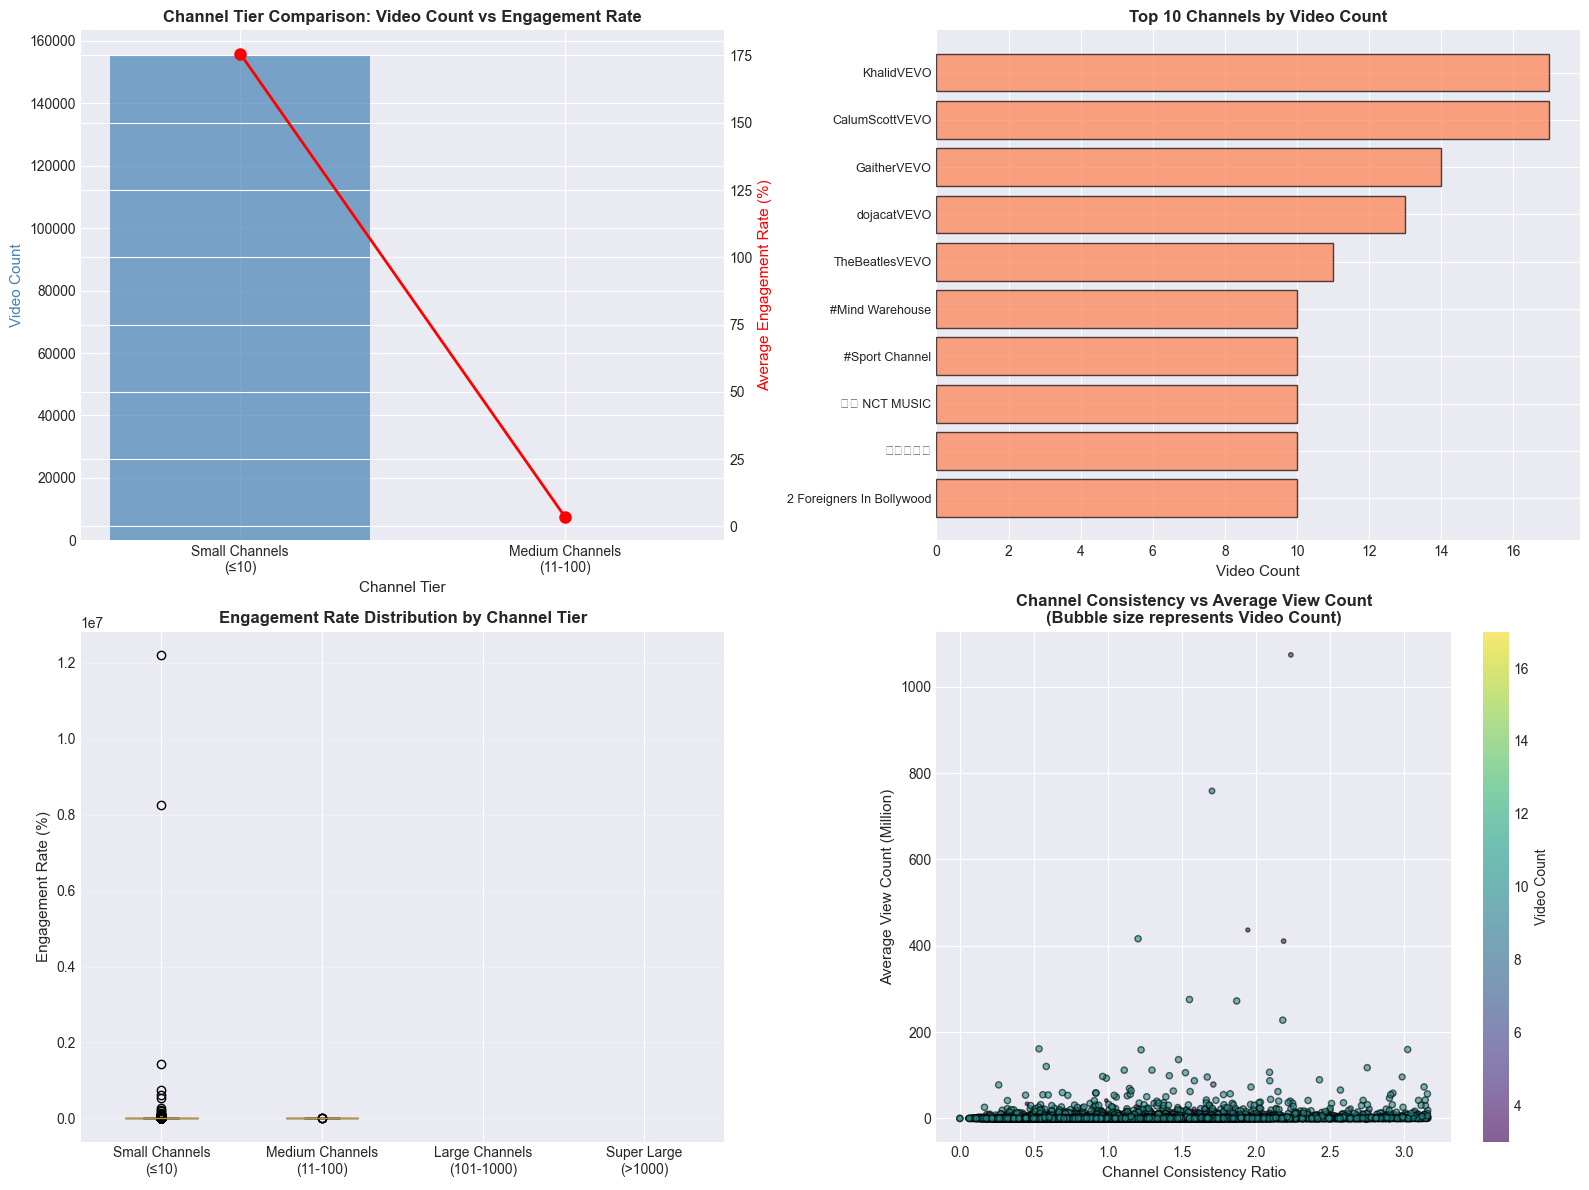


 Channel comparison visualization saved: channel_comparison.png


In [10]:
# 8. Channel comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Video Count and Engagement Rate by channel tier
ax1 = axes[0, 0]
tier_data = df.groupby('channel_tier', observed=True).agg({
    'video_id': 'count',
    'engagement_rate': 'mean'
}).rename(columns={'video_id': 'Video Count'})

ax1_2 = ax1.twinx()
tier_labels_all = ['Small Channels\n(≤10)', 'Medium Channels\n(11-100)', 'Large Channels\n(101-1000)', 'Super Large\n(>1000)']
tier_labels = [tier_labels_all[i-1] for i in tier_data.index]  # Only select labels for existing tiers
bars = ax1.bar(tier_data.index, tier_data['Video Count'], alpha=0.7, color='steelblue', label='Video Count')
line = ax1_2.plot(tier_data.index, tier_data['engagement_rate'] * 100, color='red', marker='o', linewidth=2, markersize=8, label='Average Engagement Rate')
ax1.set_xlabel('Channel Tier', fontsize=11)
ax1.set_ylabel('Video Count', fontsize=11, color='steelblue')
ax1_2.set_ylabel('Average Engagement Rate (%)', fontsize=11, color='red')
ax1.set_xticks(tier_data.index)
ax1.set_xticklabels(tier_labels)
ax1.set_title('Channel Tier Comparison: Video Count vs Engagement Rate', fontsize=12, fontweight='bold')

# Top 10 channels by video count
ax2 = axes[0, 1]
top_10_channels = df.groupby('channel_name')['video_id'].count().sort_values(ascending=False).head(10)
ax2.barh(range(len(top_10_channels)), top_10_channels.values, color='coral', edgecolor='black', alpha=0.7)
ax2.set_yticks(range(len(top_10_channels)))
ax2.set_yticklabels([name[:30] + '...' if len(name) > 30 else name for name in top_10_channels.index], fontsize=9)
ax2.set_xlabel('Video Count', fontsize=11)
ax2.set_title('Top 10 Channels by Video Count', fontsize=12, fontweight='bold')
ax2.invert_yaxis()

# Engagement Rate distribution by channel tier (boxplot)
ax3 = axes[1, 0]
tier_engagement = [df[df['channel_tier'] == tier]['engagement_rate'].values * 100 for tier in range(1, 5)]
bp = ax3.boxplot(tier_engagement, labels=tier_labels_all, patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
ax3.set_ylabel('Engagement Rate (%)', fontsize=11)
ax3.set_title('Engagement Rate Distribution by Channel Tier', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')

# Channel consistency vs average view count
ax4 = axes[1, 1]
channel_stats = df.groupby('channel_name').agg({
    'channel_consistency_ratio': 'first',
    'view_count': 'mean',
    'video_id': 'count'
}).query('video_id >= 3')  # At least 3 videos

scatter = ax4.scatter(channel_stats['channel_consistency_ratio'], 
                     channel_stats['view_count'] / 1e6,
                     s=channel_stats['video_id'] * 2,
                     alpha=0.6, c=channel_stats['video_id'],
                     cmap='viridis', edgecolor='black')
ax4.set_xlabel('Channel Consistency Ratio', fontsize=11)
ax4.set_ylabel('Average View Count (Million)', fontsize=11)
ax4.set_title('Channel Consistency vs Average View Count\n(Bubble size represents Video Count)', fontsize=12, fontweight='bold')
cbar = plt.colorbar(scatter, ax=ax4)
cbar.set_label('Video Count', fontsize=10)

plt.tight_layout()
plt.savefig('photo/channel_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Channel comparison visualization saved: channel_comparison.png")